# Example 1: Making and plotting MagGrid objects

`PlateCurie` comes equipped with a number of classes to handle 2D array data that all inherit from a parent `Grid` class from the `PlateFlex` package. This parent `Grid` class contains methods for loading 2D data, making contours based on the data, calculating the wavelet transform and scalogram, and plotting the grid, wavelet transform and scalograms. In this first example we will expect the reader to be familiar with the `PlateFlex` `Grid` class ([see here](https://github.com/paudetseis/PlateFlex/blob/master/plateflex/examples/Notebooks/Ex1_making_grids.ipynb)) and will explore how to load magnetic anomaly data from a three-column `.xyz` file, deal with outliers and mask regions with data gaps.

Start by importing the necessary modules.

In [1]:
import numpy as np
import pandas as pd
from plateflex import Grid
from platecurie import MagGrid

Let's load magnetic anomaly data covering the northwestern part of the North American continent extracted from the NAMAG model. This file was obtained separately using GMT (check the `PlateFlex` project's Wiki page [here](https://github.com/paudetseis/PlateFlex/wiki/How-to-make-gridded-data-sets-with-GMT) for more details on data preparation). The NAMAG model contains many gaps that are set to 0 in the original data set, as well as some strange data points with unrealistic values. 

In [2]:
# Read header (first line) of data set using pandas to get grid parameters
xmin, xmax, ymin, ymax, zmin, zmax, dx, dy, nx, ny = \
pd.read_csv('../data/Mag_NWCAN.xyz', sep='\t', nrows=0).columns[1:].values.astype(float)

# Change type of nx and ny from float to integers
nx = int(nx); ny = int(ny)

Now we can load the data using `pandas`. Note how the data are reshaped and flipped in the vertical direction to be consistent with the map orientation during plotting.

In [3]:
# Read topography data 
magdata = pd.read_csv('../data/Mag_NWCAN.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]

Let's first check what the `magdata` grid contains by initializing a `MagGrid` object and plotting it with default arguments:

grid contains NaN values. Performing interpolation...


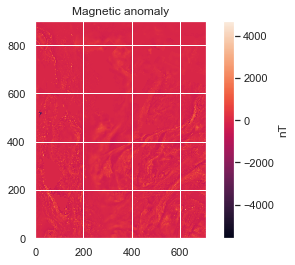

In [4]:
# Load the data as `MagGrid` object
mag = MagGrid(magdata, dx, dy)

# Plot it with default arguments
mag.plot()

This plot clearly shows that the NAMAG model contains some strange data points with unrealistically large negative values. These outliers can significantly alter the results of the estimation (at a later stage), so first we can mitigate the effect of the data outliers by setting those values to `nan`. When loaded to a `MagGrid` object, `PlateCurie` will automatically interpolate over any `nan` values, which will result in a smoother data over the data outliers. We do this on the original data set:

grid contains NaN values. Performing interpolation...


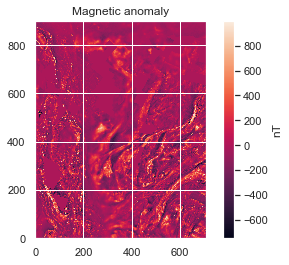

In [5]:
# Set very large (positive and negative) values to nan's
magdata[magdata<-750] = np.nan
magdata[magdata>1000] = np.nan

# Re-load into MagGrid object and plot
mag = MagGrid(magdata, dx, dy)
mag.plot()

This is much better, but let's make the plot a little bit nicer by choosing a different color scale and limiting the range of colors to show

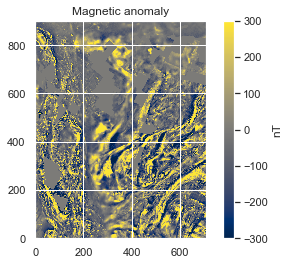

In [6]:
mag.plot(vmin=-300, vmax=300, cmap='cividis')

Now it appears more obvious that the NAMAG model contains data gaps that were set to `0` (integer `0`, not float!) when the grids were generated in `GMT`. We can make a mask over these regions to highlight them in a new plot:

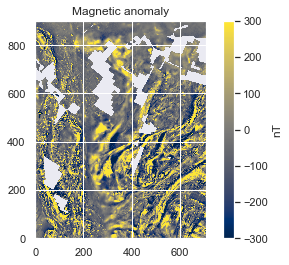

In [7]:
mask = (magdata==0)
mag.plot(mask=mask, vmin=-300, vmax=300, cmap='cividis')

Let's examine the attributes available for the object `mag`:

In [8]:
mag.__dict__

{'nx': 901,
 'ny': 709,
 'dx': 3.0007198422,
 'dy': 2.9983555564,
 'units': 'nT',
 'sg_units': 'nT$^2$/|k|',
 'logsg_units': 'log(nT$^2$/|k|)',
 'title': 'Magnetic anomaly',
 'ns': 23,
 'k': array([7.30748500e-06, 9.05580887e-06, 1.12224212e-05, 1.39073978e-05,
        1.72347581e-05, 2.13581931e-05, 2.64681644e-05, 3.28007020e-05,
        4.06483062e-05, 5.03734584e-05, 6.24253640e-05, 7.73607014e-05,
        9.58693347e-05, 1.18806179e-04, 1.47230689e-04, 1.82455794e-04,
        2.26108544e-04, 2.80205263e-04, 3.47244683e-04, 4.30323357e-04,
        5.33278696e-04, 6.60866213e-04, 8.18979185e-04]),
 'data': array([[  28.84045792, -307.1807251 , -170.17022705, ..., -278.61288452,
         -364.32470703, -309.62512207],
        [ 101.52077484, -249.99012756, -269.92980957, ..., -252.4082489 ,
         -310.90719604, -391.87365723],
        [  61.96705627,   86.92495728,    2.72172356, ..., -235.75090027,
         -262.74267578, -308.13418579],
        ...,
        [-101.1909256 ,  -86.

As in the `PlateFlex` example, there's a few things to note at this point. 
* The grid parameters (`nx`, `ny`, `dx`, `dy`) are always available as `MagGrid` object attributes. You can extract their value using, e.g., `mag.nx`
* The `data` attribute is a 2D numpy array of shape (`nx`, `ny`). You can check this with `mag.data.shape`. 
* The `k` attribute is the optimal set of adjacent wavelet-equivalent wavenumbers automatically calculated based on the grid parameters during initialization of the `MagGrid` object. 
* The attributes `units`, `sg_units`, `logsg_units` and `title` are set to default values for magnetic anomaly data. 

<div class="alert alert-block alert-info">
<b>Note:</b> The string attributes are mainly used in figure labels. It is the responsibility of the user to ensure that the data set has the correct units of nT (nanoTesla).
</div>

You can now go to Example 2 to calculate the wavelet transform and scalogram and plot them.